In [5]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
data=web.get_data_yahoo('^GDAXI',start = "2009-01-01", end = "2020-04-30")

In [8]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,4974.729980,4838.490234,4856.850098,4973.069824,91772100.0,4973.069824
2009-01-05,5034.850098,4949.359863,5010.180176,4983.990234,150630500.0,4983.990234
2009-01-06,5111.020020,4960.209961,4992.669922,5026.310059,120803000.0,5026.310059
2009-01-07,5010.970215,4914.220215,5008.620117,4937.470215,137572000.0,4937.470215
2009-01-08,4917.620117,4820.080078,4897.160156,4879.910156,156333900.0,4879.910156


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2869 entries, 2009-01-02 to 2020-04-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2869 non-null   float64
 1   Low        2869 non-null   float64
 2   Open       2869 non-null   float64
 3   Close      2869 non-null   float64
 4   Volume     2869 non-null   float64
 5   Adj Close  2869 non-null   float64
dtypes: float64(6)
memory usage: 156.9 KB


In [11]:
#keep only close column
data_close=data.filter(['Close'])
dataset=data_close.values

In [12]:
#training data length
train_len=math.ceil(len(dataset)*0.8)
train_len

2296

In [13]:
#scale data to make model more efficient
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.12908355],
       [0.13016237],
       [0.1343431 ],
       ...,
       [0.70428812],
       [0.73512118],
       [0.71080916]])

In [15]:
#training dataset
train_data=scaled_data[0:train_len,:]
#split the data into x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.12908355, 0.13016237, 0.1343431 , 0.12556671, 0.11988041,
       0.11039469, 0.10404553, 0.09587764, 0.07467853, 0.06622021,
       0.06913941, 0.06418616, 0.05664955, 0.05875374, 0.05463128,
       0.0506323 , 0.06524617, 0.06490533, 0.08419884, 0.07524753,
       0.06638026, 0.05973077, 0.06999691, 0.08163722, 0.0833858 ,
       0.09663732, 0.09882944, 0.08289678, 0.08532203, 0.07321744,
       0.07379339, 0.06917501, 0.05435271, 0.05320279, 0.05421538,
       0.03440325, 0.02667697, 0.02265627, 0.01776226, 0.02728651,
       0.01751825, 0.00431314, 0.00240157, 0.02218108, 0.00287279,
       0.        , 0.00253098, 0.02178988, 0.02446905, 0.02863003,
       0.02837122, 0.03735508, 0.03174683, 0.03259148, 0.03724838,
       0.03974576, 0.05037843, 0.0514641 , 0.0550136 , 0.05857791])]
[0.05306348354663598]

[array([0.12908355, 0.13016237, 0.1343431 , 0.12556671, 0.11988041,
       0.11039469, 0.10404553, 0.09587764, 0.07467853, 0.06622021,
       0.06913941, 0.06418616, 0.05

In [16]:
#convert x_train y_train into np
x_train,y_train=np.array(x_train),np.array(y_train)

In [18]:
#reshape xtrain data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2236, 60, 1)

In [19]:
#build lstm model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [21]:
#compile model
model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)


Epoch 1/1
2236/2236 [==============================] - 104s 47ms/step - loss: 0.0015


In [23]:
#create the testing dataset
test_data=scaled_data[train_len-60:,:]
x_test=[]
y_test=dataset[train_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i])



In [24]:
#convert data into to a np
x_test=np.array(x_test)

In [25]:
#reshape xtest
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [26]:
#get the model predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [27]:
#evaluate the model rmse
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

508.0699580061082

In [33]:
#plot data
train=data[:train_len]
valid=data[train_len:]
valid['Predictions']=predictions


C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


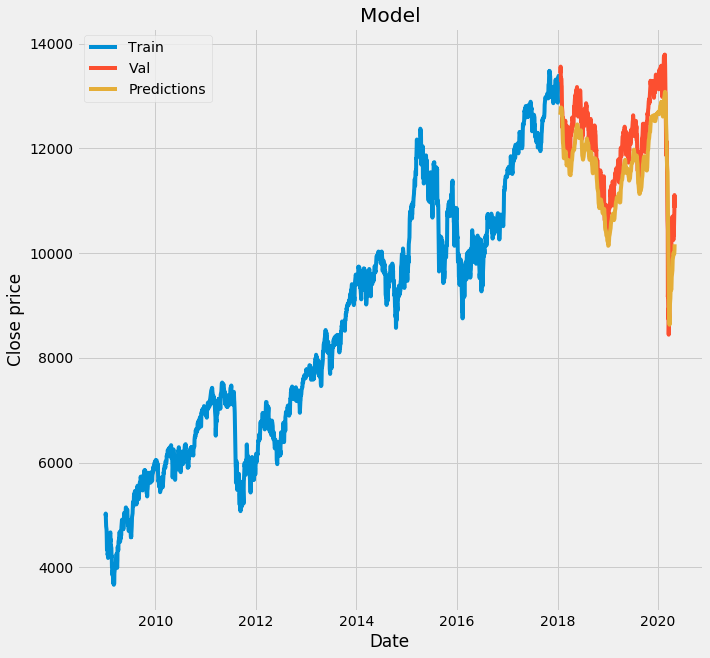

In [30]:
plt.figure(figsize=(10,10))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

In [31]:
#show the valid and predicted prices
valid

,High,Low,Open,Close,Volume,Adj Close,Predictions
Date,,,,,,,
2018-01-19,13445.469727,13294.809570,13297.740234,13434.450195,108147200.0,13434.450195,12638.096680
2018-01-22,13470.049805,13410.959961,13435.139648,13463.690430,95295700.0,13463.690430,12666.660156
2018-01-23,13596.889648,13517.809570,13577.139648,13559.599609,97239000.0,13559.599609,12704.592773
2018-01-24,13576.839844,13414.740234,13572.709961,13414.740234,105385100.0,13414.740234,12754.450195
2018-01-25,13443.360352,13222.469727,13374.379883,13298.360352,106119200.0,13298.360352,12780.723633
...,...,...,...,...,...,...,...
2020-04-24,10486.469727,10299.309570,10299.309570,10336.089844,120035000.0,10336.089844,9996.100586
2020-04-27,10660.360352,10523.099609,10551.070312,10659.990234,122476600.0,10659.990234,9983.049805
2020-04-28,10897.820312,10651.580078,10658.469727,10795.629883,146549900.0,10795.629883,10008.822266
